# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = api key
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID= + api key"
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

570

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
record = 1

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print('Beginning Data Retrieval')
print('------------------------------')

for city in cities:
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        
        print(f'Processing Record {record} of {len(cities)} | {city_record}')
        record = record + 1
    
    except KeyError:
        print(f'City not found. Skipping...')
        record = record + 1
        
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')


Beginning Data Retrieval
------------------------------
Processing Record 1 of 570 | Cape Town
Processing Record 2 of 570 | Hithadhoo
Processing Record 3 of 570 | Punta Arenas
Processing Record 4 of 570 | Ilulissat
Processing Record 5 of 570 | Qaanaaq
Processing Record 6 of 570 | Ushuaia
Processing Record 7 of 570 | Takoradi
Processing Record 8 of 570 | Cabo San Lucas
Processing Record 9 of 570 | Taoudenni
Processing Record 10 of 570 | Santa Isabel do Rio Negro
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of 570 | Hilo
Processing Record 14 of 570 | Alofi
Processing Record 15 of 570 | Bluff
Processing Record 16 of 570 | Betsiamites
Processing Record 17 of 570 | Fairbanks
Processing Record 18 of 570 | Busselton
Processing Record 19 of 570 | Neiafu
Processing Record 20 of 570 | Saint-Augustin
Processing Record 21 of 570 | Vaitape
Processing Record 22 of 570 | Hovd
Processing Record 23 of 570 | Damietta
Processing Record 24 of 570 | Jamestown
Processing Reco

Processing Record 214 of 570 | Vestmannaeyjar
Processing Record 215 of 570 | Anton Lizardo
Processing Record 216 of 570 | Port Elizabeth
Processing Record 217 of 570 | Ituporanga
Processing Record 218 of 570 | Pec
City not found. Skipping...
Processing Record 220 of 570 | Georgetown
Processing Record 221 of 570 | Altamira
Processing Record 222 of 570 | Port Lincoln
Processing Record 223 of 570 | Vila Franca do Campo
Processing Record 224 of 570 | Minakuchi
Processing Record 225 of 570 | Parrita
Processing Record 226 of 570 | Talnakh
Processing Record 227 of 570 | Yar-Sale
City not found. Skipping...
Processing Record 229 of 570 | Nikolskoye
Processing Record 230 of 570 | Kaeo
Processing Record 231 of 570 | Lunglei
Processing Record 232 of 570 | Borda da Mata
Processing Record 233 of 570 | Solnechnyy
Processing Record 234 of 570 | Belmonte
Processing Record 235 of 570 | Dikson
Processing Record 236 of 570 | Cedar City
Processing Record 237 of 570 | Mercedes
Processing Record 238 of 570 

Processing Record 422 of 570 | Sens
City not found. Skipping...
Processing Record 424 of 570 | Zyryanka
Processing Record 425 of 570 | Zhuzhou
Processing Record 426 of 570 | Palmer
Processing Record 427 of 570 | Richland
City not found. Skipping...
Processing Record 429 of 570 | Leirvik
Processing Record 430 of 570 | Piacabucu
Processing Record 431 of 570 | Iaciara
Processing Record 432 of 570 | Bridlington
Processing Record 433 of 570 | Ekibastuz
Processing Record 434 of 570 | Marystown
Processing Record 435 of 570 | Broken Hill
Processing Record 436 of 570 | Wonthaggi
Processing Record 437 of 570 | Shatsk
Processing Record 438 of 570 | Oranjemund
Processing Record 439 of 570 | Matai
City not found. Skipping...
Processing Record 441 of 570 | Ixtapa
City not found. Skipping...
City not found. Skipping...
Processing Record 444 of 570 | Andilamena
Processing Record 445 of 570 | Egvekinot
Processing Record 446 of 570 | Namatanai
City not found. Skipping...
Processing Record 448 of 570 | P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
city_weather_data[0]

{'coord': {'lon': -56.83, 'lat': -26.98},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 22.9,
  'pressure': 1018.91,
  'humidity': 37,
  'temp_min': 22.9,
  'temp_max': 22.9,
  'sea_level': 1018.91,
  'grnd_level': 1005.85},
 'wind': {'speed': 3.98, 'deg': 151.049},
 'clouds': {'all': 0},
 'dt': 1569086226,
 'sys': {'message': 0.0085,
  'country': 'PY',
  'sunrise': 1569058701,
  'sunset': 1569102163},
 'timezone': -14400,
 'id': 3437029,
 'name': 'San Patricio',
 'cod': 200}

In [35]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()

City          506
Cloudiness    506
Country       506
Date          506
Humidity      506
Lat           506
Lng           506
Max Temp      506
Wind Speed    506
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [39]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,75,ZA,1569087508,82,-33.93,18.42,15.56,4.60
1,Hithadhoo,100,MV,1569087474,77,-0.60,73.08,25.30,3.99
2,Punta Arenas,20,CL,1569087610,65,-53.16,-70.91,7.00,15.40
3,Ilulissat,75,GL,1569087747,52,69.22,-51.10,8.00,6.70
4,Qaanaaq,11,GL,1569087747,45,77.48,-69.36,-4.61,2.03


#### Latitude vs. Humidity Plot

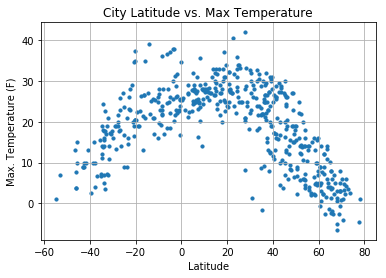

In [40]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

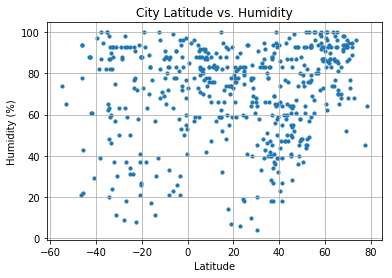

In [41]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

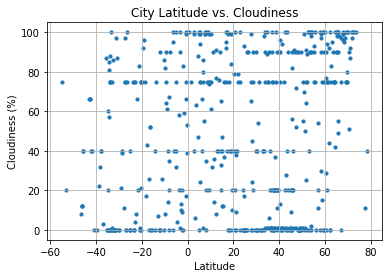

In [42]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

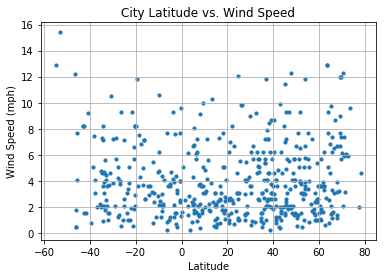

In [44]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()